# Supervised Machine Learning
## Intro
- $(x_{i},y_{i}) \propto p(x,y), i.i.d$
- $x_{i} \in R^{p}$ -> $p$ is the number of features
- $y_{i} \in R$
- learn $f(x_{i}) \approx y_{i}$, such that $f(x) \approx y$ for new $(x,y) \propto p(x,y)$
- Classification -> Predict a class label
  - Binary: Two classes
  - Multiclass: Many classes
- Regression -> Predict a continuous number

## Generalization
- Fit a model and predict on new, unseen data that comes from the same distribution as the training data
  - If a model is able to predict well on unseen data, it generalizes
- If we allow to build very complex models, it can always be as accurate as we can on the training set
- We expect simple models to generalize better to new data
- Overfitting -> Building a model that is too complex for the ammount of information we have
- Underfitting -> Choosing a too simple model
- The larger the variety of data points in your dataset, the more complex the model can be without overfitting

In [1]:
%matplotlib inline
from preamble import *

## KNN
- To find a prediction for a new data point, finds the closest data points in the training data
- For multiclass classification -> How many neighbors belong to each class and again predict the most common class
- Using k = 1 leads to a boundary that follow training data closely
- Using large k leads to a more smooth decision boundary
- Analysis
  - Strenghts:
    - Very easy to understand/implement
    - Reasonable performance with few adjustments
    - Good baseline
  - Weaknessess:
    - Slow to predict new data
    - Does not perform well with datasets with many features, sparse features
  - Parameters:
    - K: Number of neighbors 
    - Distance: Normally euclidean, but can vary

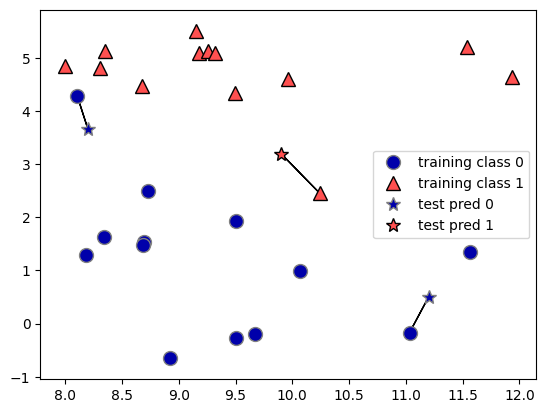

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1) # Using to classify the point the nearest data point

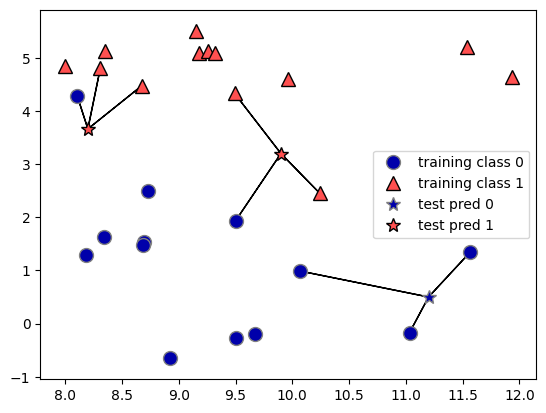

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3) # Using to classify the point the nearest data point

In [8]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


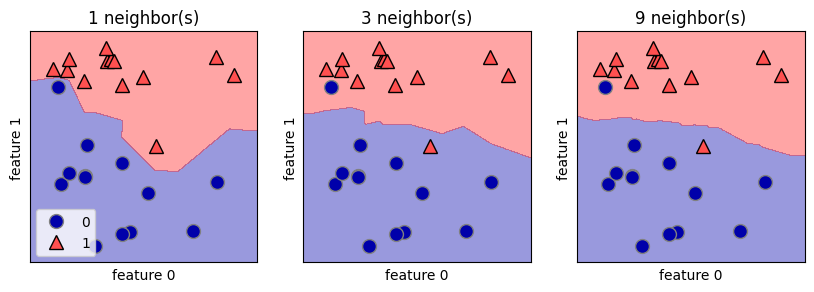

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

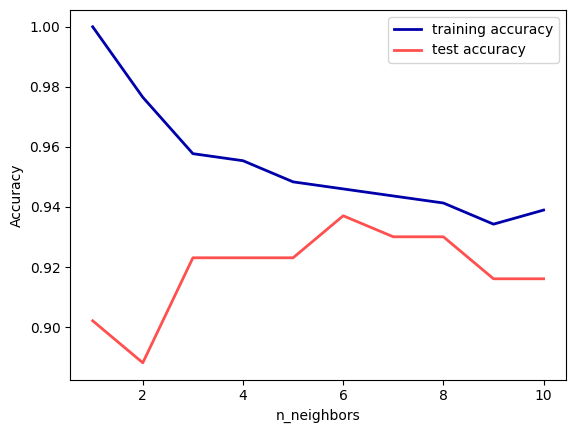

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
# Number of neighbors too low -> Overfitting
# Number of neighbors too high -> Underfitting

## Linear Models
- Regression:
  - $\hat{y} = w_{0}x_{0} + w_{1}x_{1} + ... + w_{p}x_{p} + b$, where
    - $x_{i}$: Features
    - $w_{i}$: Weights
    - $b$: Bias/Intercept
  - Prediction can be seen as
    - Line for a single feature
    - Plane for two features
    - Hyperplane for $p$ features
  - Can be powerfull for datasets with many features.
  - **If you have more features than training points, any target $y$ can be perfectly modeled by a linear function**

w[0]: 0.393906  b: -0.031804


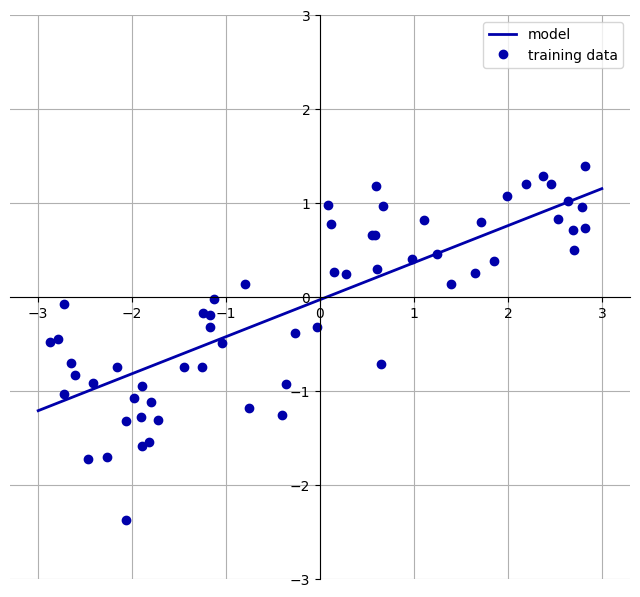

In [13]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression (OLS)
- Finds $w$ and $b$ that minimizes the $MSE$ between the prediction and the target
- $R^{2}$ coefficient of determination, is a meas‐
ure of goodness of a prediction for a regression model, and yields a score between 0
and 1.
- In high dimensional data, there is a higher chance of overfitting. 

In [14]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.03180434302675973


In [15]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) # Uses R^{2}
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [17]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


(506, 104)
Training set score: 0.95
Test set score: 0.61


### Ridge Regression
- Uses $L_{2}$ regularization, so it constrais the weights $w$. Helps to control the magnitude of the coefficients restricting them to be close to 0.
- Regularization means explictly restricting a model to avoid overfitting
- Penalizes the euclidean lenght of $w$.
- Tradeoff between performance on the training set and simplicity. Can be specified by parameter $\alpha$.
  - Higher $\alpha$ -> More regularization
  - Lower $\alpha$ -> Less regularization

In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [19]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [21]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


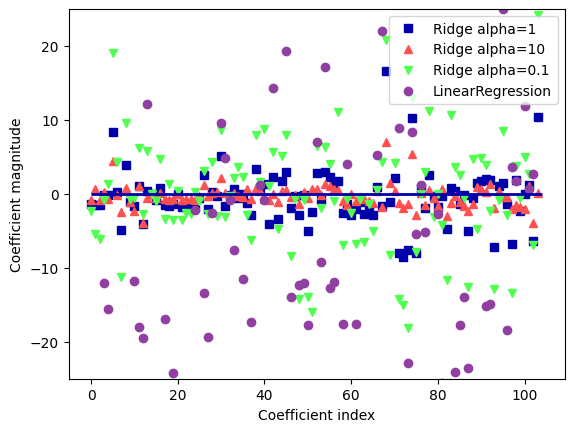

In [22]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


### Lasso
- Regularization with $L_{1}$ norm
- Can cause some coefficients to be exactly 0.
- Can be seen as automatic feature selection
- Lasso might be a better choice when the number of features is really large and expect only few of them to be important
- Ridge normally first choice
- Elastic Net -> Combines both L1 and L2 regularization

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [25]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


### Linear models for classification
- The decision boundary is a linear function of the input
- SVMs and Logistic Regression
- Parameter C
  - High C: Tries to fit the training data as best as possible. Using this causes the algorithm to try to adjust the importance of each individual point to be classified correctly
  - Low C: Coefficients near 0. Using this cause the algorithm to try to adjust to the majority of data points
- Strenghts
  - Fast to train and fast to predict
  - Scale to very large datasets and sparse data
  - For large data
    - Change LR solver to 'sag'
    - SGDClassifier and SGDRegressor
  - Easy to interpret
- Weaknesses:
  - If correlated features, coefficients are hard to interpret
  - Not that good in low dimensional space
- Parameters:
  - Alpha and C: Regularizers. Searched for in logarithmic scale

c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


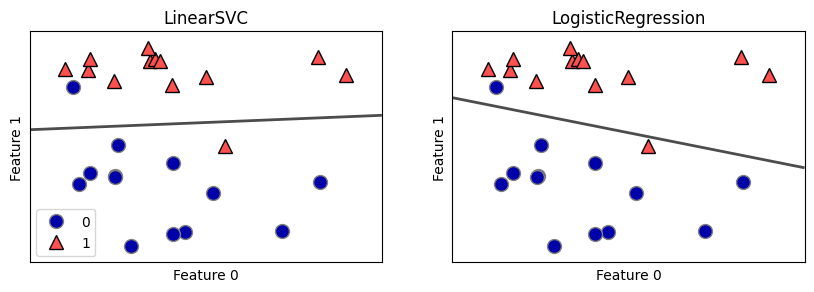

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# By default, both apply L2 regularization
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()

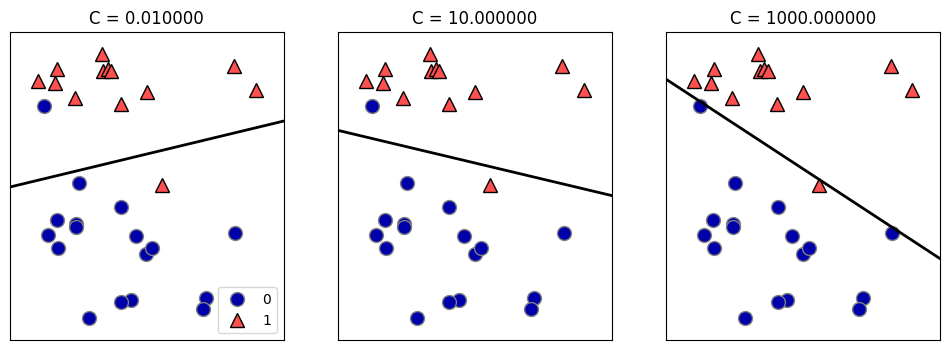

In [29]:
mglearn.plots.plot_linear_svc_regularization()

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=3000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [38]:
logreg100 = LogisticRegression(C=100,max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


In [40]:
logreg001 = LogisticRegression(C=0.01,max_iter=3000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


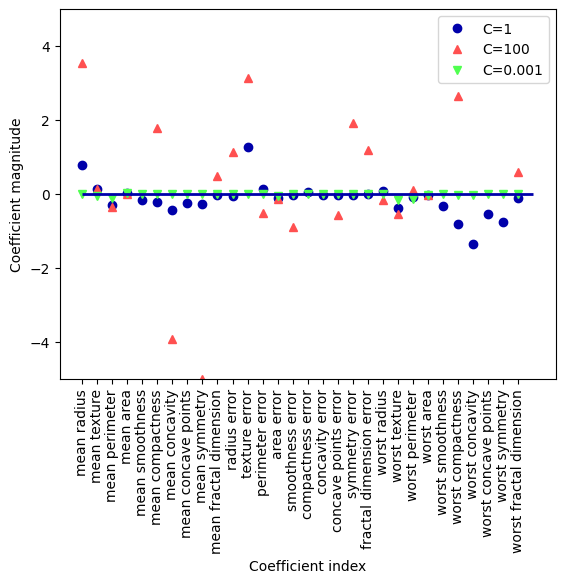

In [41]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


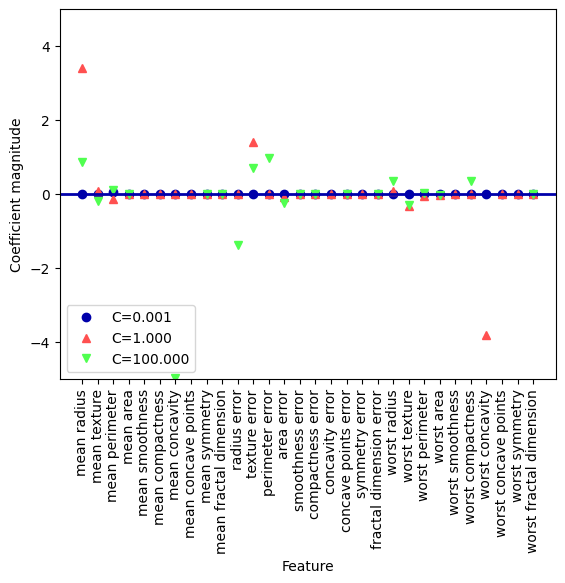

In [43]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)


### Linear models for multiclass
- Technique to extend binary to multiclass
  - One-vs-rest: 
    - A binary model is learned for each class that tries to separate that class from all others, resulting in a model for each class
    - Prediction: The classifier that has the highest score wins


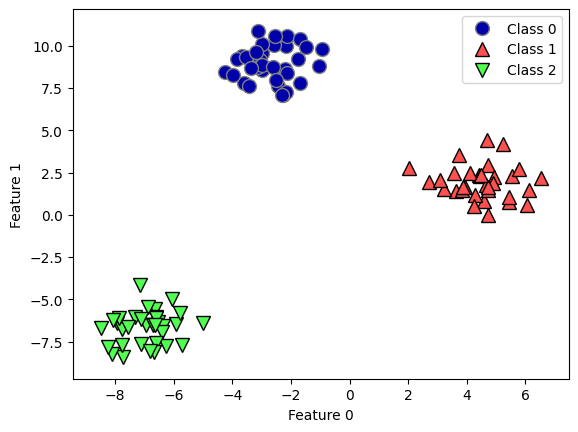

In [44]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [45]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape) # Contains the coefficient vector for each class
print("Intercept shape: ", linear_svm.intercept_.shape) # One intercept per class

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


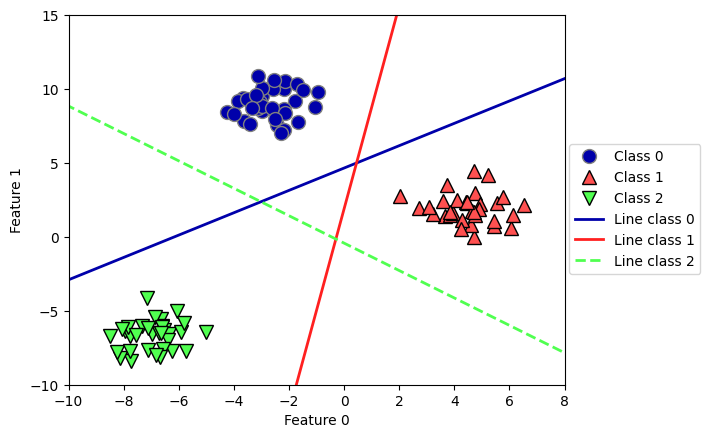

In [46]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
# If a point is in the triangle at the middle, it's classified to the closest line

## Naive Bayes Classifiers
- Similar to linear models, but faster
- Provide generalization performance that is worse than SVC and Logistic Regression
- Efficiency
  - Look at each feature individually and compute simple statistics
- Three NB classifiers
  - GaussianNB: 
    - Any continuous data
    - Mean and standard deviation for each feature for each class
  - BernoulliNB: 
    - Binary data
    - Count how often every feature of each class is not 0. 
  - MultinomialNB: 
    - Count data
    - Average value of each feature per class
- Prediction
  - Data is compared to statistic for each class and the best match is returned
- Strenghts
  - Multinomial/Bernoulli
    - Good for sparse data, such as text
    - Multinomial usually performs better, particulary on datasets with large number of nonzero features
  - GaussianNB
    - Good on high dimensional data
  - Good baselines when training a linear model might take long


$$p(y|x) = \frac{p(y)\prod_{i=1}^{P}p(x_{i}|y)}{\sum_{k=1}^Kp(y=k)\prod_{i=1}^{P}p(x_{i}|y=k)}$$

## Decision trees